# Word Cloud

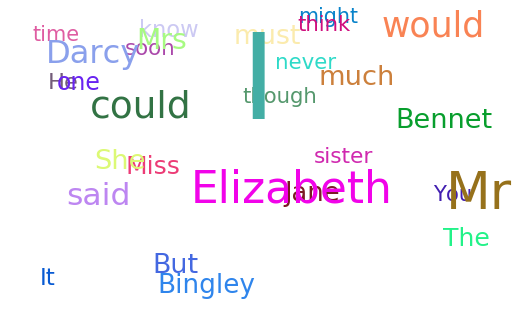

In [232]:
# -*- coding: utf-8 -*-
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import operator
import matplotlib.pyplot as plt

tokenizer = RegexpTokenizer(r'\w+')
allwords = []
file = open("pride_prejudice.txt", "r", encoding='utf-8')
mylines = file.readlines()
for line in mylines:
    sents = tokenizer.tokenize(line)
    allwords.append(sents)

words = [item for sublist in allwords for item in sublist]
words = [word for word in words if word not in stopwords.words("english")]
freq = nltk.FreqDist(words)

# Make a dictionary with most common words
cloudwords = {}
for x in freq.most_common(30):
    cloudwords[x[0]] = x[1]

#Calculate the total number of words
totalweight = sum(cloudwords.values())

#Calculate the weight of any given word in our cloud and make a weight dictionary
weights = {}
for key, value in cloudwords.items():
    weight = round(value/totalweight,4)
    weights[key] = weight

#Sort the words with similar weights
sorted_weights = sorted(weights.items(), key=operator.itemgetter(1))
sum_weight = sum([weight for word,weight in sorted_weights])
percent = [(word,round(weight/sum_weight*100, 2)) for (word,weight) in sorted_weights]


####################################################################
# Plotting Our Word Cloud :)
####################################################################
# build a rectangle in axes coords
left, width = .1, 2
bottom, height = .1, 2
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


for entry in percent[1:]:
    for i in range(10):
        x = random.random()
        y = random.random()
    r = lambda: random.randint(0,255)
    mycolor = '#%02X%02X%02X' % (r(),r(),r())
    ax.text(x, y, entry[0],
        horizontalalignment='left',
        verticalalignment='bottom',
        fontsize=10+entry[1]*6, color=mycolor,
        transform=ax.transAxes)

ax.set_axis_off()
plt.show()